## Pull the Data

In [11]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2024-01-12 06:51:39--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.1’

cifar-10-python.tar 100%[===================>] 162.60M  56.6MB/s    in 2.9s    

2024-01-12 06:51:42 (56.6 MB/s) - ‘cifar-10-python.tar.gz.1’ saved [170498071/170498071]



## Unzip the data

In [12]:
import tarfile

# Define the path to the tar.gz file
tar_file_path = '/content/cifar-10-python.tar.gz'

# Specify the directory where you want to extract the contents
extracted_dir_path = '/content/cifar-10-python/'

# Open and extract the tar.gz file
with tarfile.open(tar_file_path, 'r:gz') as tar:
    tar.extractall(path=extracted_dir_path)

# List the contents of the extracted directory (optional)
!ls -l {extracted_dir_path}


total 4
drwxr-xr-x 2 2156 1103 4096 Jun  4  2009 cifar-10-batches-py


##Import Moduls

In [13]:
import numpy as np
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [14]:
cifar_dataset_path = '/content/cifar-10-python/cifar-10-batches-py'

In [15]:
import matplotlib.pyplot as plt

def load_all_batches(cifar_dataset_path):
    # Initialize lists to hold all images and labels
    all_images = []
    all_labels = []

    # Load all data batches
    for i in range(1, 6):  # There are 5 data batches in CIFAR-10
        batch = load_data_batch(f'{cifar_dataset_path}/data_batch_{i}')
        all_images.append(batch[b'data'])
        all_labels.append(batch[b'labels'])

    # Convert lists to numpy arrays and concatenate
    all_images = np.concatenate(all_images)
    all_labels = np.concatenate(all_labels)

    return all_images, all_labels

# Load all data batches
images, labels = load_all_batches(cifar_dataset_path)


## Process the Images and Prepare the Dataset

In [16]:
from skimage.feature import hog
from skimage import color

def apply_hog_to_images(images):
    hog_features = []

    for image in images:
        # Reshape and convert to a 2D grayscale image
        image_reshaped = image.reshape(3, 32, 32).transpose(1, 2, 0)
        gray_image = color.rgb2gray(image_reshaped)

        # Apply HOG feature descriptor
        hog_feature = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9)
        hog_features.append(hog_feature)

    return np.array(hog_features)

# Apply HOG to all images
hog_features = apply_hog_to_images(images)

# Print shape for verification
print(f'HOG features shape: {hog_features.shape}')


HOG features shape: (50000, 324)


## Splitting the Data

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Training set size: 40000
Testing set size: 10000


## Implement Different Classifiers

#k-Nearest Neighbors (kNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Compute accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'kNN Accuracy: {accuracy_knn}')


kNN Accuracy: 0.4594


# Support Vector Machine (SVM)

In [19]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm = SVC(kernel='linear')

# Train the classifier
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Compute accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')


SVM Accuracy: 0.5244


# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Train the classifier
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Compute accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')


Logistic Regression Accuracy: 0.5156


kNN Accuracy: 0.4594
SVM Accuracy: 0.5244
Logistic Regression Accuracy: 0.5156


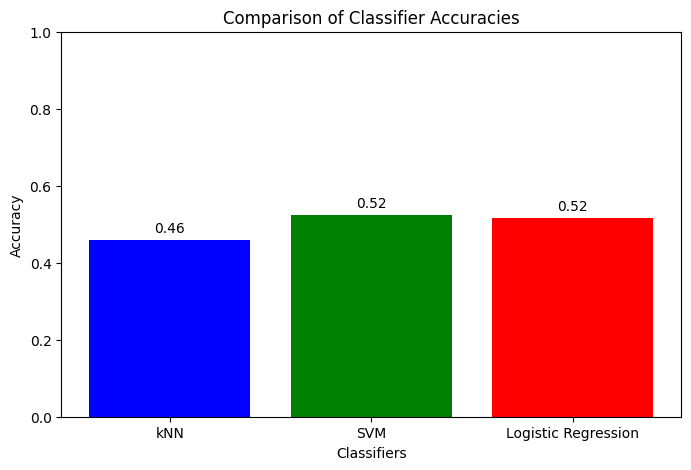

In [22]:
import matplotlib.pyplot as plt

# Assuming these variables hold the accuracies of your models
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'kNN Accuracy: {accuracy_knn}')

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')

# Classifier names and their corresponding accuracies
classifiers = ['kNN', 'SVM', 'Logistic Regression']
accuracies = [accuracy_knn, accuracy_svm, accuracy_log_reg]

# Creating the bar plot
plt.figure(figsize=(8, 5))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1

# Adding the accuracy values on top of the bars
for i in range(len(classifiers)):
    plt.text(i, accuracies[i] + 0.02, f'{accuracies[i]:.2f}', ha = 'center')

# Show the plot
plt.show()
